1.   **Cloning repo**
2.   **Copying weights from drive to yolo**
3.   **Change current directory to yolo**
4.   **Load weights**


In [ ]:
!git clone https://github.com/theAIGuysCode/yolo-v3.git

Cloning into 'yolo-v3'...
remote: Enumerating objects: 188, done.
remote: Total 188 (delta 0), reused 0 (delta 0), pack-reused 188
Receiving objects: 100% (188/188), 66.46 MiB | 40.78 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [ ]:
!cp /content/drive/My\ Drive/yolov3/yolov3.weights /content/yolo-v3/weights 

In [ ]:
cd /content/yolo-v3/

/content/yolo-v3


In [ ]:
!python load_weights.py

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

**copying video from drive to colab**    
*Download script-notebook saved on drive*








In [ ]:
cd /content

/content


In [ ]:
mkdir videos

In [ ]:
!cp /content/drive/My\ Drive/8m\ videos/1.mp4 /content/videos

**video to frames**            
*stored in frames folder*

In [ ]:
!mkdir /content/frames

In [ ]:
cd /content/frames

/content/frames


In [ ]:
import cv2
import os 
cap= cv2.VideoCapture('/content/videos/1.mp4')
i = 0
predictList = []
while(cap.isOpened()):
    os.chdir('/content/frames/')      #back to frame extraction folder 
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('frame.jpg',frame)    #frame extracted 
    os.chdir('/content/yolo-v3/')    #to yolo folder 
    !python detect.py images 0.5 0.5 '/content/frames/frame.jpg' #predict formed 
    predictList.append('/content/yolo-v3/detections/detection_1.jpg')
    #!cp /content/yolo-v3/detections/detection_1.jpg /content/predictionFrames #move frame to other folder 
    #os.rename(r'/content/predictionFrames/detection_1.jpg',r'/content/predictionFrames/'+str(i)+'.jpg') #renamed predict frame
    os.remove('/content/frames/frame.jpg')  #remove generated frame 
    i += 1
cap.release()
cv2.destroyAllWindows()

In [ ]:
#video detection 
#!python detect.py video 0.5 0.5 /content/1.mp4
#cd /content/yolo-v3/
print(predictList)

['/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yolo-v3/detections/detection_1.jpg', '/content/yo

In [ ]:
#image detection 
#!python detect.py images 0.5 0.5 1.jpg 2.jpg 3.jpg 
#!python detect.py images 0.5 0.5 data/images/dog.jpg data/images/office.jpg 
#os.chdir('/content/yolo-v3/')    
#!python detect.py images 0.5 0.5 data/images/dog.jpg data/images/office.jpg
#!python detect.py images 0.5 0.5 'data/images/dog.jpg' 
#import os 
!python detect.py images 0.5 0.5 data/images/dog.jpg data/images/office.jpg


In [ ]:
import imageio
import numpy as np

arr = np.array(predictList)
#reader = imageio.get_reader('/content/videos/1.mp4') # We open the video.
#fps = reader.get_meta_data()['fps'] # We get the fps frequence (frames per second).
#writer = imageio.get_writer('output.mp4', fps = fps) # We create an output video with this same fps frequence.
#os.chdir('/content/predictionFrames/')
#for i,frame in enumerate(arr): # We iterate on the frames of the output video:
  #  writer.append_data(frame) # We add the next frame in the output video.
 #   print(i) # We print the number of the processed frame.
#writer.close()
import cv2
img = cv2.imread(predictList[0])
height, width, layers = img.shape
size = (width,height)
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)    
for i in range(len(predictList)):
    out.write(predictList[i])
out.release()



TypeError: ignored

In [ ]:
import glob
import cv2
import os 

img_array = []
for filename in glob.glob('/content/predictionFrames/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
os.chdir('/content')
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)    
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [ ]:
!rm -rfv /content/predictionFrames

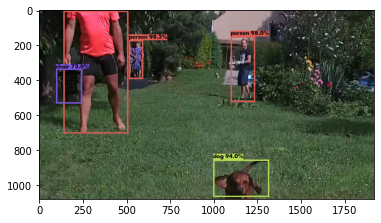

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(predictList[23])
imgplot = plt.imshow(img)
plt.show()